In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import coffea.util as util
import time
import json
import os
import copy
from hist import Hist
sys.path.append("../../analysisTools/")
import plotTools as ptools
import utils
import mplhep as hep
import utils
hep.style.use("CMS")
plt.rcParams['font.size'] = 16.0
from matplotlib.colors import Normalize, LogNorm
from copy import deepcopy
from tqdm import tqdm
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

# Plots

In [61]:
hcs = ptools.histContainer("skimmed_signal_histos_cuts_vtxV7_noMassL20_MassG0p1.coffea")
hcb = ptools.histContainer("skimmed_bkg_histos_cuts_vtxV7_noMassL20_MassG0p1.coffea",bkg=True)
dfs = utils.get_dict_fromCutflow(hcs.load('cutflow'))
dfs['legend'] = dfs.apply(ptools.make_label,axis=1)
selected_signals = ["sig_2018_Mchi-10p5_dMchi-1p0_ctau-1",
                    "sig_2018_Mchi-11p0_dMchi-2p0_ctau-100",
                    "sig_2018_Mchi-52p5_dMchi-5p0_ctau-10",
                    "sig_2018_Mchi-77p0_dMchi-14p0_ctau-100"]
selected_labels = [dfs[dfs.name==s].legend.item() for s in selected_signals]

In [62]:
cuts = ['cut6']
cutDesc = hcs.load('cutDesc')

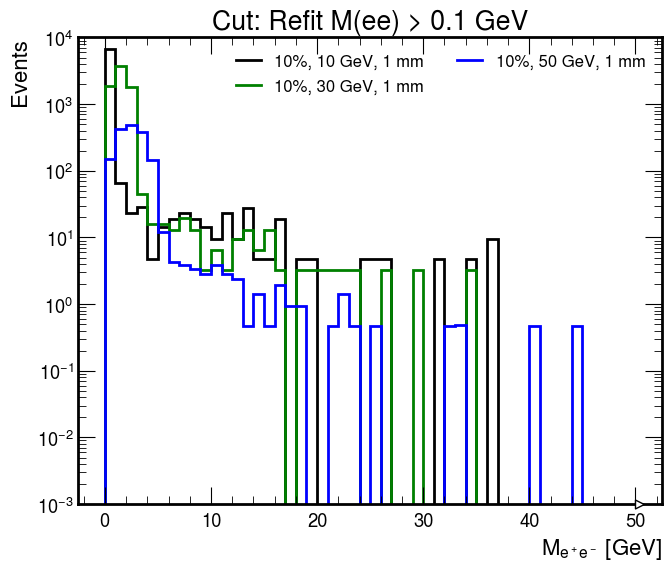

In [67]:
for i,cut in enumerate(cuts):
    selected_signals = ["sig_2018_Mchi-10p5_dMchi-1p0_ctau-1",
                        "sig_2018_Mchi-31p5_dMchi-3p0_ctau-1",
                        "sig_2018_Mchi-52p5_dMchi-5p0_ctau-1"]
    selected_labels = [dfs[dfs.name==s].legend.item() for s in selected_signals]
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_maxMiniRelIsoEleCorr_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = "$M_{e^+e^-}$ [GeV]"
    title = f"Cut: {cutDesc[CUT]}"
    hname = "sel_vtx_corrMass_long"
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=None,ylim=[1e-3,1e4],ncol_leg=2,xlabel=xlabel,rebin=2j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False,legend_loc='upper right',sigOnly=True)

/opt/conda/lib/python3.9/site-packages/hist/basehist.py:400: UserWarning: List indexing selection is experimental. Removed bins are not placed in overflow.
  return super().__getitem__(self._index_transform(index))


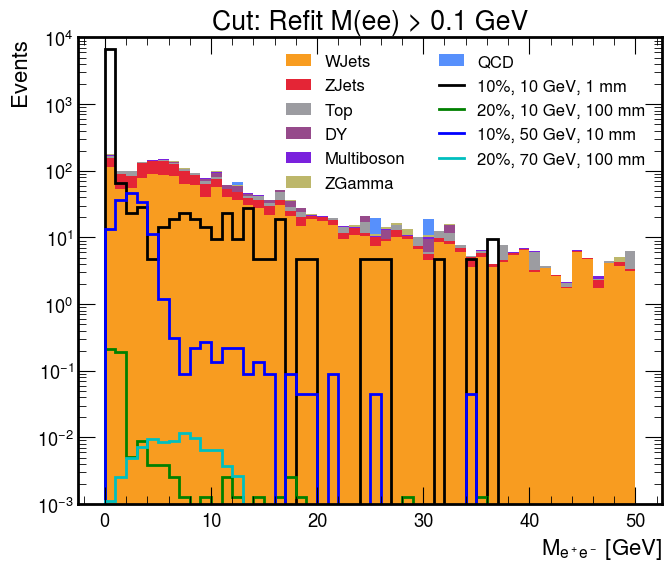

In [10]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_maxMiniRelIsoEleCorr_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = "$M_{e^+e^-}$ [GeV]"
    title = f"Cut: {cutDesc[CUT]}"
    hname = "sel_vtx_corrMass_long"
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=None,ylim=[1e-3,1e4],ncol_leg=2,xlabel=xlabel,rebin=2j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False,legend_loc='upper right')

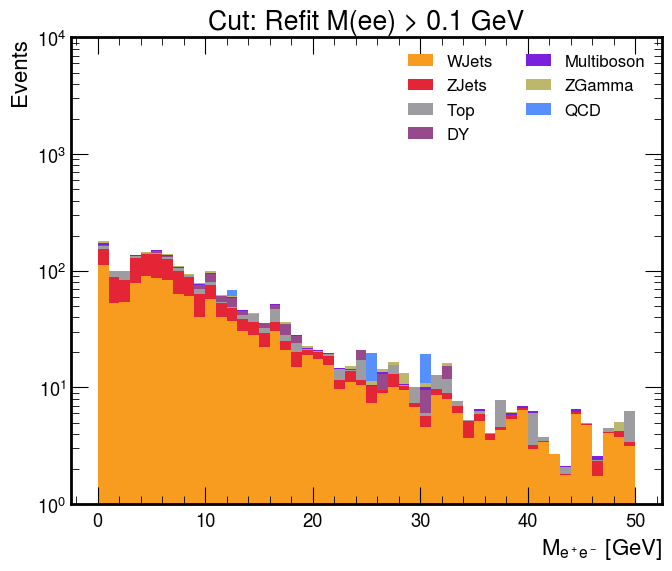

In [12]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_maxMiniRelIsoEleCorr_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = "$M_{e^+e^-}$ [GeV]"
    title = f"Cut: {cutDesc[CUT]}"
    hname = "sel_vtx_corrMass_long"
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=None,ylim=[1e0,1e4],ncol_leg=2,xlabel=xlabel,rebin=2j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False,legend_loc='upper right',bkgOnly=True)

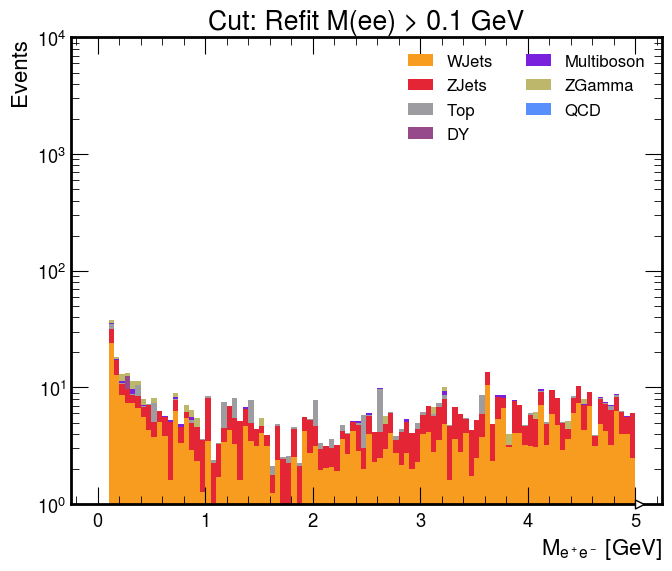

In [14]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_maxMiniRelIsoEleCorr_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = "$M_{e^+e^-}$ [GeV]"
    title = f"Cut: {cutDesc[CUT]}"
    hname = "sel_vtx_corrMass_low"
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=None,ylim=[1e0,1e4],ncol_leg=2,xlabel=xlabel,rebin=5j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False,legend_loc='upper right',bkgOnly=True)

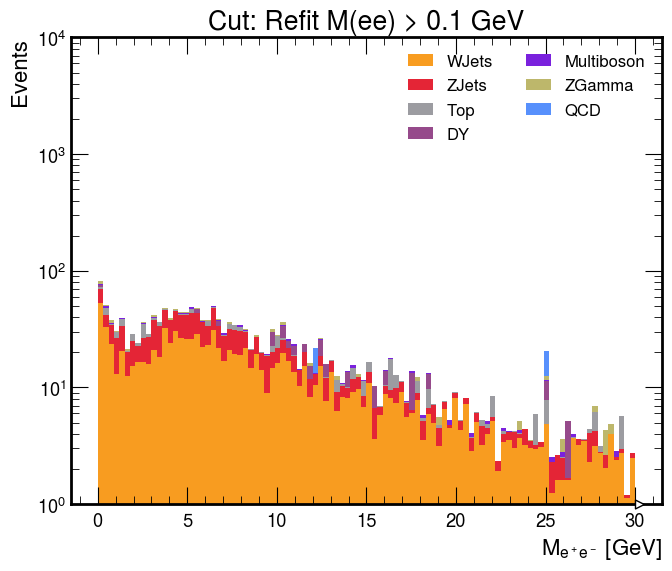

In [16]:
for i,cut in enumerate(cuts):
    CUT = cuts[i]
    outD = f"plots_sigVsBkg/observables/{CUT}"
    outName = "sel_vtx_maxMiniRelIsoEleCorr_selectedSignals"+f"_{CUT}"
    selection = {"cut":CUT}
    xlabel = "$M_{e^+e^-}$ [GeV]"
    title = f"Cut: {cutDesc[CUT]}"
    hname = "sel_vtx_corrMass"
    ptools.plot_samples_sigBkg(hcs,hcb,hname,selection,selected_signals,selected_labels,outName,outD,
                 figsize=(7,6),xlim=None,ylim=[1e0,1e4],ncol_leg=2,xlabel=xlabel,rebin=1j,
                        save=False,show=True,logy=True,density=False,title=title,histtype='step',yerr=False,legend_loc='upper right',bkgOnly=True)

In [55]:
selection = {"cut":"cut6","mass":slice(None,20j,sum)}
hname = "sel_vtx_corrMass_long"
ptools.getBkgComposition(hcb,hname,selection)

Background Composition is:
	Multiboson : 27.4435 (1.5927%)
	ZGamma : 19.1597 (1.1119%)
	Top : 104.8806 (6.0867%)
	DY : 69.7293 (4.0467%)
	ZJets : 469.3762 (27.2401%)
	WJets : 1024.2206 (59.4403%)
	QCD : 8.2986 (0.4816%)


In [56]:
selection = {"cut":"cut6","mass":slice(20j,None,sum)}
hname = "sel_vtx_corrMass_long"
ptools.getBkgComposition(hcb,hname,selection)

Background Composition is:
	Multiboson : 7.3236 (1.9194%)
	ZGamma : 8.3989 (2.2012%)
	Top : 37.3768 (9.7959%)
	DY : 27.8917 (7.3100%)
	ZJets : 32.4963 (8.5168%)
	WJets : 251.4711 (65.9068%)
	QCD : 16.5972 (4.3499%)


# cutflows - VR

In [58]:
hcs = ptools.histContainer("skimmed_signal_histos_cuts_VR_vtxV7_noMassL20_MassG0p1_VRMassG20.coffea")
hcb = ptools.histContainer("skimmed_bkg_histos_cuts_VR_vtxV7_noMassL20_MassG0p1_VRMassG20.coffea",bkg=True)
dfs = utils.get_dict_fromCutflow(hcs.load('cutflow'))
dfs['legend'] = dfs.apply(ptools.make_label,axis=1)
selected_signals = ["sig_2018_Mchi-10p5_dMchi-1p0_ctau-1",
                    "sig_2018_Mchi-11p0_dMchi-2p0_ctau-100",
                    "sig_2018_Mchi-52p5_dMchi-5p0_ctau-10",
                    "sig_2018_Mchi-77p0_dMchi-14p0_ctau-100"]
selected_labels = [dfs[dfs.name==s].legend.item() for s in selected_signals]

In [59]:
cfs = hcs.load('cutflow_cts')
cfb = hcb.load('cutflow_cts')
cutDesc = hcs.load('cutDesc')
cuts,descs = [],[]
for c,d in cutDesc.items():
    cuts.append(c)
    descs.append(d)

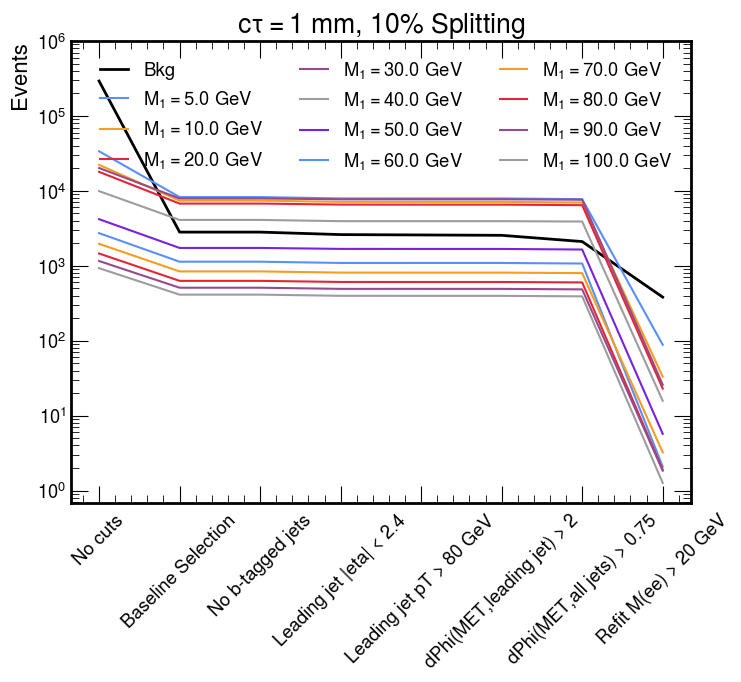

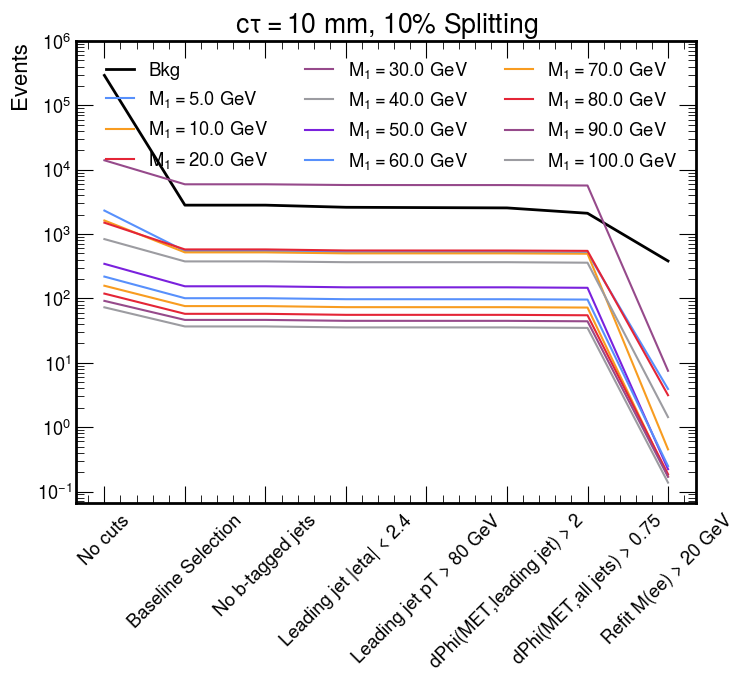

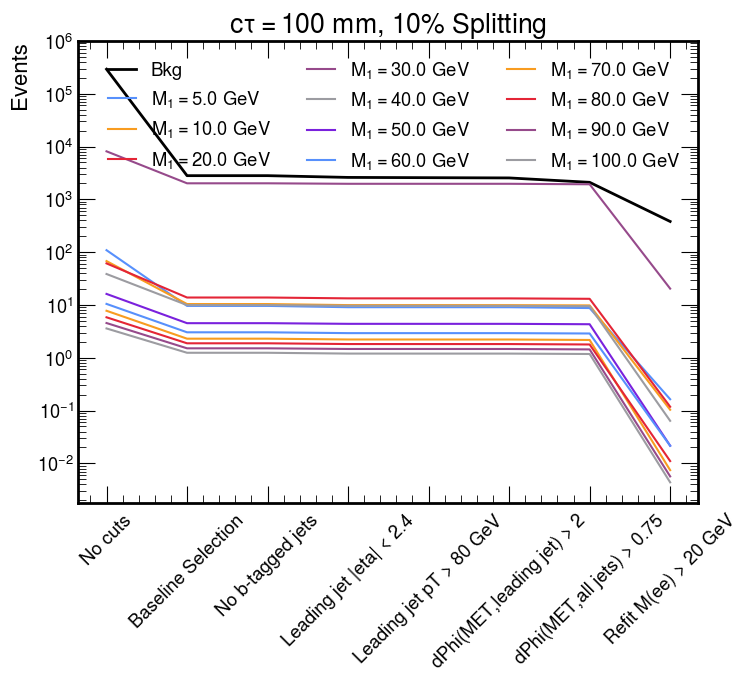

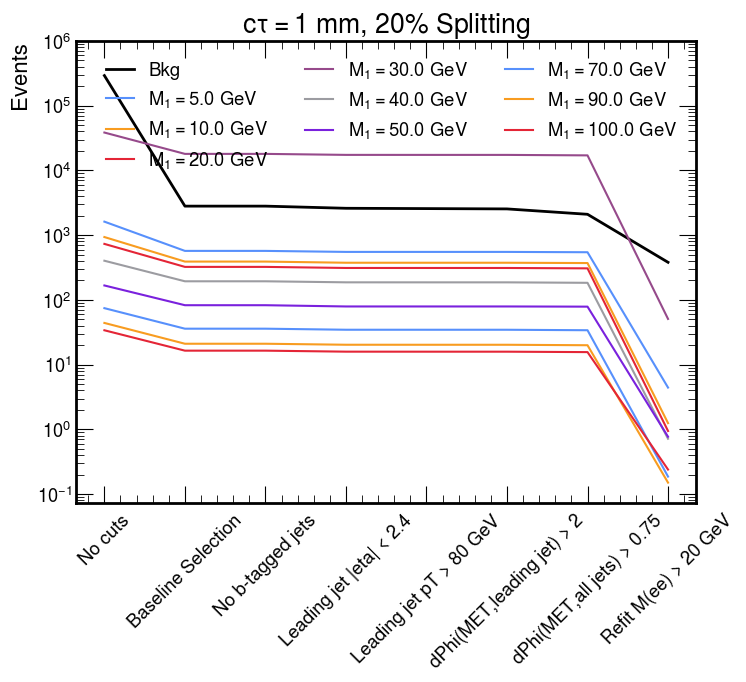

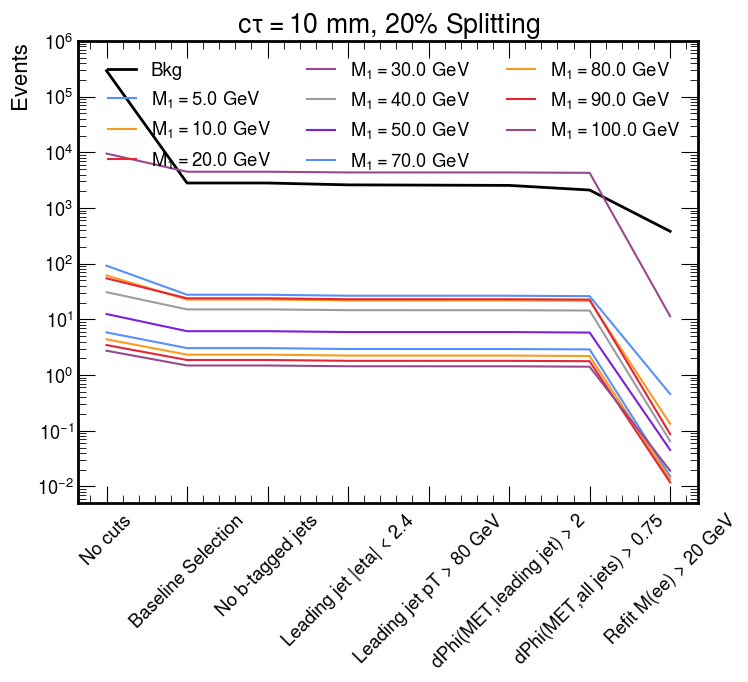

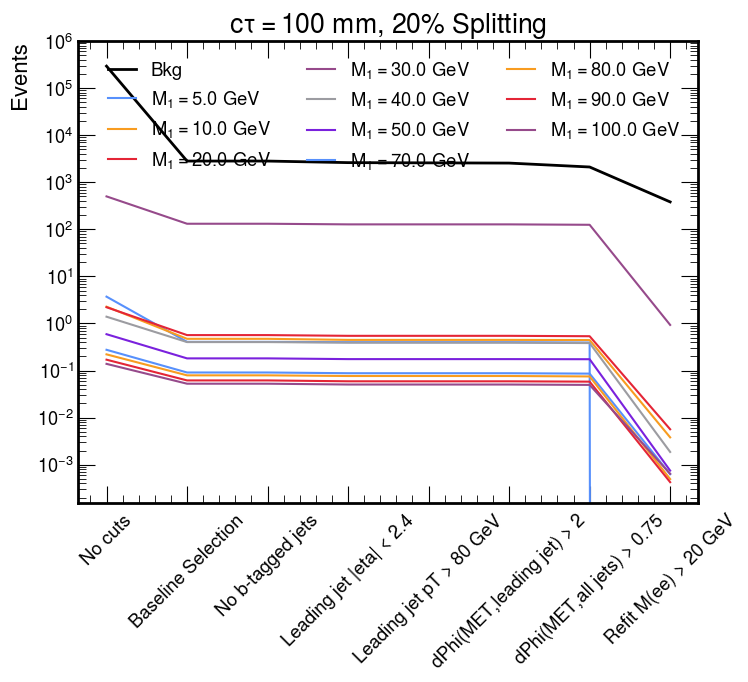

In [60]:
ctaus = [1,10,100]
deltas = [0.1,0.2]
for d in deltas:
    dfc = dfs[dfs.delta==d]
    for ct in ctaus:
        dfc2 = dfc[dfc.ctau==ct]
        m1s = sorted(list(set(dfc2.m1)))
        plt.figure(figsize=(8,6))
        bkg_line = [sum([cfb[b][cut] for b in cfb.keys()]) for cut in cuts]
        sig_cfLines = []
        for m1 in m1s:
            dfc3 = dfc2[dfc2.m1==m1]
            name = dfc3.name[0]
            sig_cf = cfs[name]
            line = []
            for cut in cuts:
                line.append(sig_cf[cut])
            sig_cfLines.append(line)
        plt.plot(np.arange(len(cuts)),bkg_line,lw=2,color='k',label="Bkg")
        for i,m1 in enumerate(m1s):
            plt.plot(np.arange(len(cuts)),sig_cfLines[i],color=f"C{i}",label=rf"$M_1 = {m1}$ GeV")
        plt.xticks(np.arange(len(cuts)),labels=descs,rotation=45)
        plt.yscale('log')
        plt.title(rf"$c\tau = {int(ct)}$ mm, {int(100*d)}% Splitting")
        plt.ylabel("Events")
        plt.ylim([None,1e6])
        plt.legend(loc='upper right',ncol=3)